In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
most_recent_date

('2017-08-23',)

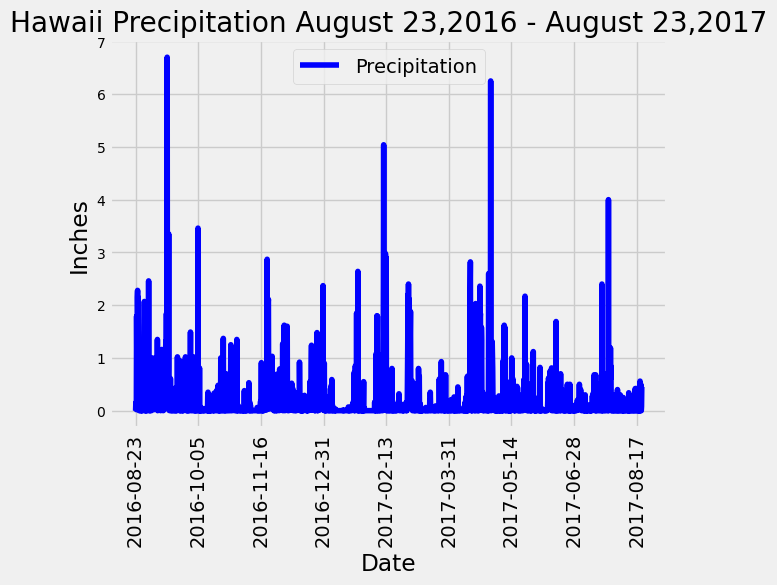

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

#Format the date from cell above and create an equation subtracting the last 365 days
entire_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
old_last_date = dt.date(entire_year.year, entire_year.month, entire_year.day)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
          filter(Measurement.date >= old_last_date).\
          order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns=["Date", "Precipitation"])

# Sort the dataframe by date

df.set_index(df["Date"])

#Since the DataFrame has NaN values in Precipitation, remove them
#Shape of cleaned_df is now smaller than shape of df. No missing values now
cleaned_df = df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data

cleaned_df.plot('Date', 'Precipitation', color="blue")

plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaii Precipitation August 23,2016 - August 23,2017")
plt.legend(["Precipitation"],loc='best')
plt.xticks(rotation=90)
plt.yticks(size = 10)
plt.show()

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
cleaned_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

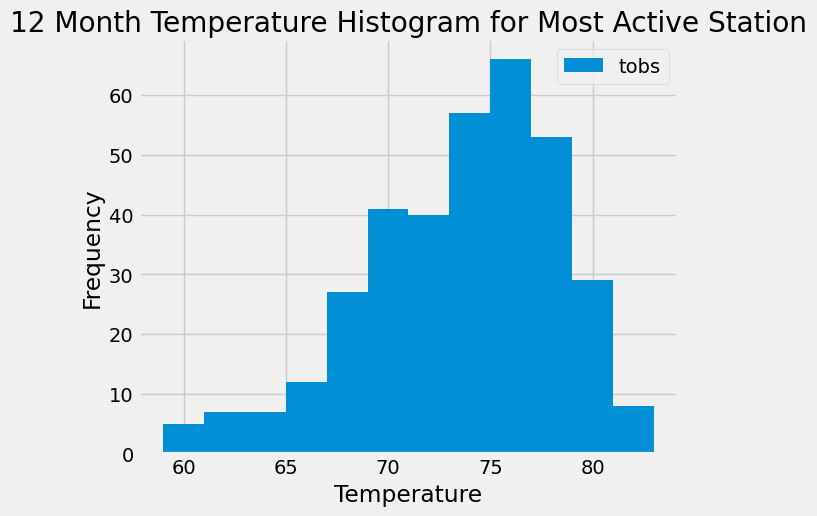

In [55]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
          filter(Measurement.date >= "2016-08-23").all()

#Plot results
high_station_temp = pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.title("12 Month Temperature Histogram for Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [16]:
# Close Session
session.close()